# SGD for Linear Regression with L2 Regularization

In [60]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(7)

# Constants
LAMBDA = 1e-3
LR = 0.001
ITERATIONS = 1000

In [61]:
def get_data():
    return pd.read_csv('data/data.csv', header=None)

In [65]:
def gradient(m, b, data):
    x = data[0].tolist()
    y = data[1].tolist()
    N = len(x)
    for i in range(0, N):
        m -= LR*((-2/N)*(y[i] - m*x[i] - b)*x[i] + 2*LAMBDA*m)
        b -= LR*((-2/N)*(y[i] - m*x[i] - b))
    return m, b

def sgd(data):
    m = 0
    b = 0
    for i in range(ITERATIONS):
        m, b = gradient(m, b, data)
    return m, b

def cost(data, m, b):
    x = np.array(data[0])
    y = np.array(data[1])
    N = float(len(x))
    error = (y-m*x-b)**2
    mse = np.sum(error)/N
    cost = mse + LAMBDA *(m**2)
    return cost

In [66]:
df = get_data()
data = df.sample(frac=1, random_state=1)

m, b = sgd(data)
error = cost(data, m, b)

print('m ->', m)
print('b ->', b)
print('Cost ->', error)

m -> 1.4524572241950602
b -> 0.5733195656705068
Cost -> 112.95579873434168


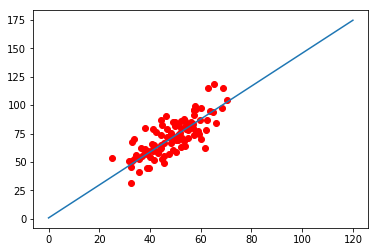

In [67]:
plt.plot(df[0], df[1], 'ro')
x = np.linspace(0, 120, 200)
y = m*x + b
plt.plot(x,y)

In [81]:
import unittest

class TestSGD(unittest.TestCase):
    def test_cost(self):
        df = pd.DataFrame({0: [10, 20], 1: [10, 20]})
        expected = 1
        obtained = cost(df, 1, 1)
        np.testing.assert_almost_equal(obtained, expected, decimal=3)
    
    def test_stochastic_gradient_descent(self):
        x = range(0,200)
        y = [i*4 for i in x]
        data = pd.DataFrame({0: x, 1: y})
        m, b = sgd(data)
        np.testing.assert_almost_equal(m, 4, decimal=3)
        np.testing.assert_almost_equal(b, 0, decimal=1)

unittest.main(argv=[''], verbosity=2, exit=False)

test_cost (__main__.TestSGD) ... ok
test_stochastic_gradient_descent (__main__.TestSGD) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.142s

OK
